<a href="https://colab.research.google.com/github/xtian20/data_project/blob/main/Conversion_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

**Optimizing conversion rate** is likely the most common work of a data scientist, and rightfully so. The data revolution has a lot to do with the fact that now we are able to collect all sorts of data about people who buy something on our site as well as people who don’t. This gives us a tremendous opportunity to understand what’s working well (and potentially scale it even further) and what’s not working well (and fix it).

The goal of this challenge is to build a model that **predicts conversion rate** and, based on the model, **come up with ideas to improve it**.

# Approach 

Step 1.  Data importing and preprocessing 

Step 2. Descriptive analysis and feature engineering 

Step 3. Recommend **optimal combination** of task rank & rate rank 

Step 4. Logistic Regression, parameter tuning and result interpretation 

Step 5. **Validating recommendations** in step 3 using the mode

# Key Findings 

- EDA 

- Modeling 

- Suggestions & Next Step 

# Data Preprocessing 

In [22]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('conversion_project.csv')
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [25]:
data.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [26]:
data[data.age>110]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [27]:
data = data[data.age<110]

In [28]:
for col in ['country', 'age', 'new_user', 'source', 'total_pages_visited', 'converted']:
  print(f'For column {[col]}, there are {data[col].nunique()} unique values.')
  print(data[col].value_counts()[:5],'\n')

For column ['country'], there are 4 unique values.
US         178092
China       76602
UK          48449
Germany     13055
Name: country, dtype: int64 

For column ['age'], there are 58 unique values.
30    14346
28    14341
29    14158
27    14084
26    13931
Name: age, dtype: int64 

For column ['new_user'], there are 2 unique values.
1    216744
0     99454
Name: new_user, dtype: int64 

For column ['source'], there are 3 unique values.
Seo       155039
Ads        88739
Direct     72420
Name: source, dtype: int64 

For column ['total_pages_visited'], there are 29 unique values.
2    43868
3    43829
4    41046
1    40739
5    36308
Name: total_pages_visited, dtype: int64 

For column ['converted'], there are 2 unique values.
0    306000
1     10198
Name: converted, dtype: int64 



In [29]:
data[data.converted==1].shape[0] / data.shape[0]

0.03225194340255157

- **Maximum age is 123 yrs old, which is a suspicious records. When digging further, we notice that there are only two users whose age older than 110. Then I choose to remove those two entire row.**

- **This site is a probably a US site, although it has a lot of Chinese user base as well.**

- **User base is pretty range. The age range mainly from 24 to 36 yrs old.**

- **The conversion rate is around 3.2%.**

# EDA 

## General Correlation

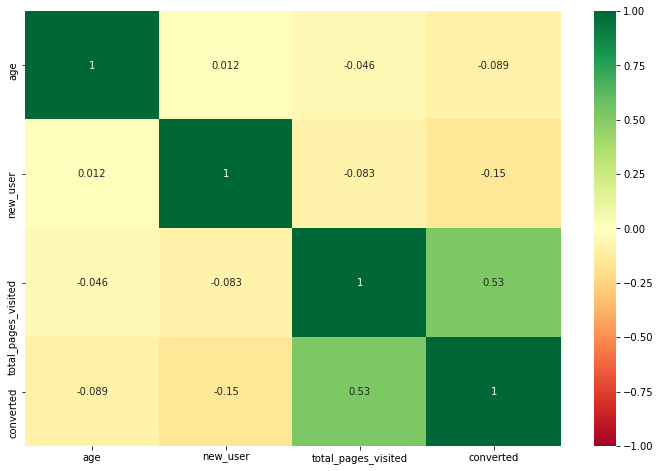

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.2g', cmap='RdYlGn', vmin=-1, vmax=1)
plt.show();

**From the general correlation between each feature:**

- **Not surprisingly, total pages visited strongly influence the converted rate. The more pages user visited, the higer possibility the user will buy things.**

**Let's dive deeper into each feature.**

## Country 

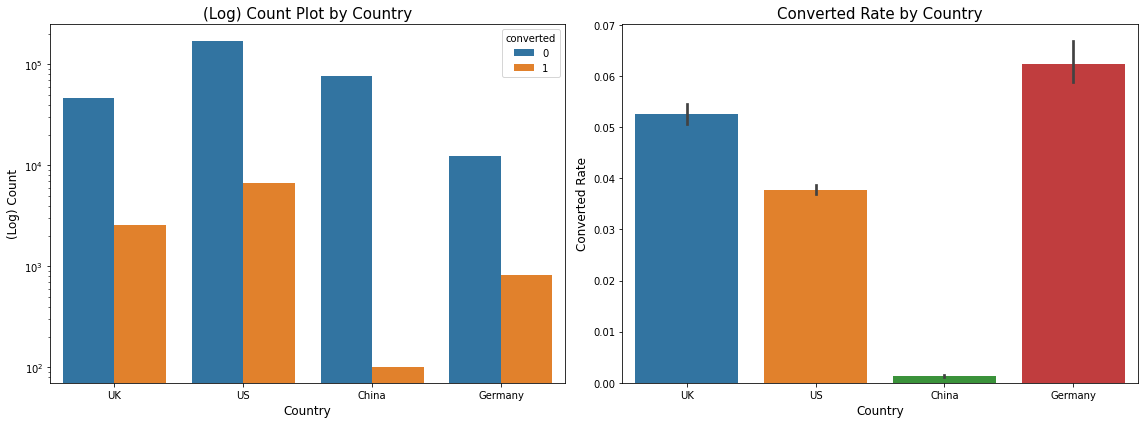

In [31]:
# visualization of different countries 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='country', hue='converted', data=data, ax=ax[0])
ax[0].set_xlabel('Country', fontsize=12)
ax[0].set_yscale('log')
ax[0].set_ylabel('(Log) Count', fontsize=12)
ax[0].set_title('(Log) Count Plot by Country', fontsize=15)

sns.barplot(x='country', y='converted', data=data, ax=ax[1])
ax[1].set_xlabel('Country', fontsize=12)
ax[1].set_ylabel('Converted Rate', fontsize=12)
ax[1].set_title('Converted Rate by Country', fontsize=15)

plt.tight_layout()
plt.show();

## Age 

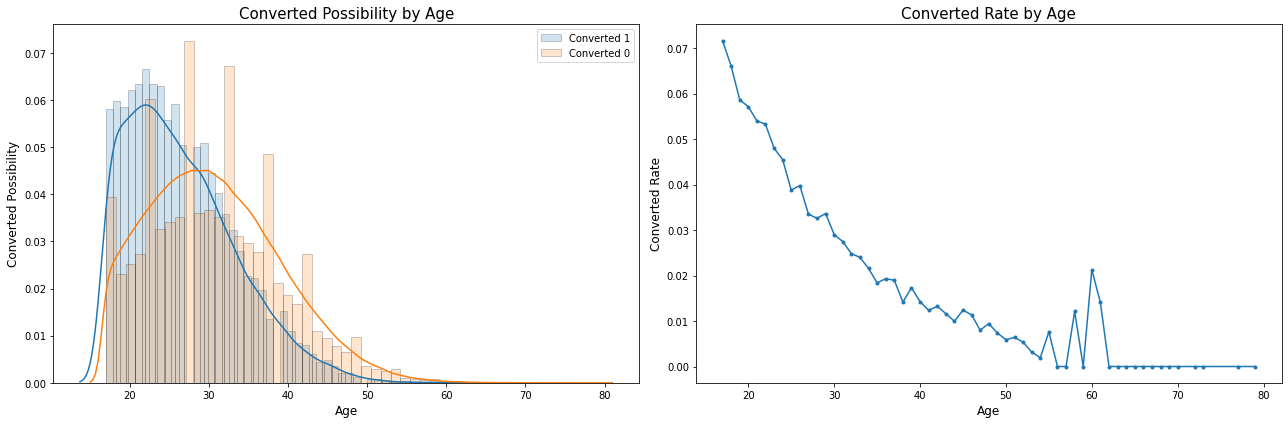

In [32]:
# Visualization of Age 
grouped = data[['age', 'converted']].groupby(['age']).mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.distplot(data[data.converted==1]['age'], label='Converted 1', hist_kws=hist_kws, ax=ax[0])
sns.distplot(data[data.converted==0]['age'], label='Converted 0', hist_kws=hist_kws, ax=ax[0])
ax[0].legend(loc='best')
ax[0].set_xlabel('Age', fontsize=12)
ax[0].set_ylabel('Converted Possibility', fontsize=12)
ax[0].set_title('Converted Possibility by Age', fontsize=15)

ax[1].plot(grouped['age'], grouped['converted'], '.-')
ax[1].set_xlabel('Age', fontsize=12)
ax[1].set_ylabel('Converted Rate', fontsize=12)
ax[1].set_title('Converted Rate by Age', fontsize=15)
plt.tight_layout()
plt.show();

## New User 

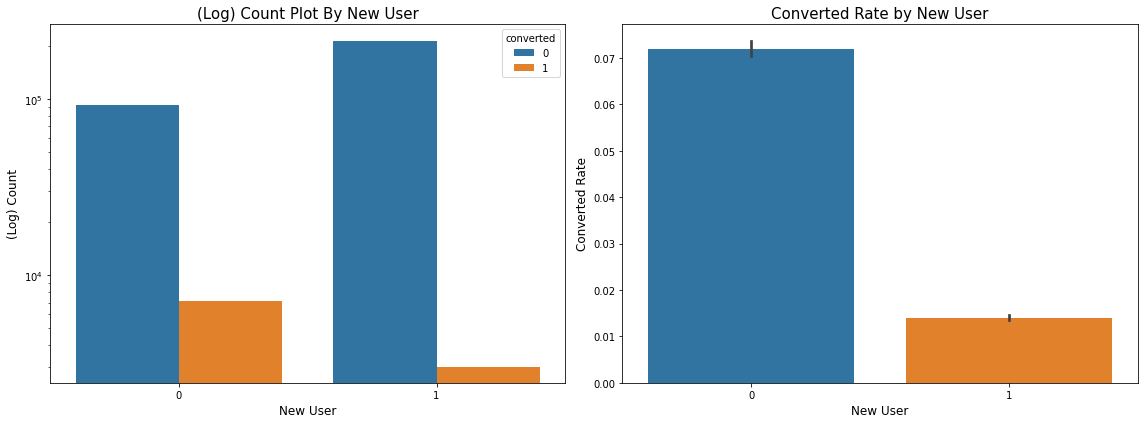

In [33]:
# Visualization by user type 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
sns.countplot(x='new_user', hue='converted', data=data, ax=ax[0])
ax[0].set_xlabel('New User', fontsize=12)
ax[0].set_yscale('log')
ax[0].set_ylabel('(Log) Count', fontsize=12)
ax[0].set_title('(Log) Count Plot By New User', fontsize=15)

sns.barplot(x='new_user', y='converted', data=data, ax=ax[1])
ax[1].set_xlabel('New User', fontsize=12)
ax[1].set_ylabel('Converted Rate', fontsize=12)
ax[1].set_title('Converted Rate by New User', fontsize=15)
plt.tight_layout()
plt.show();

## Source

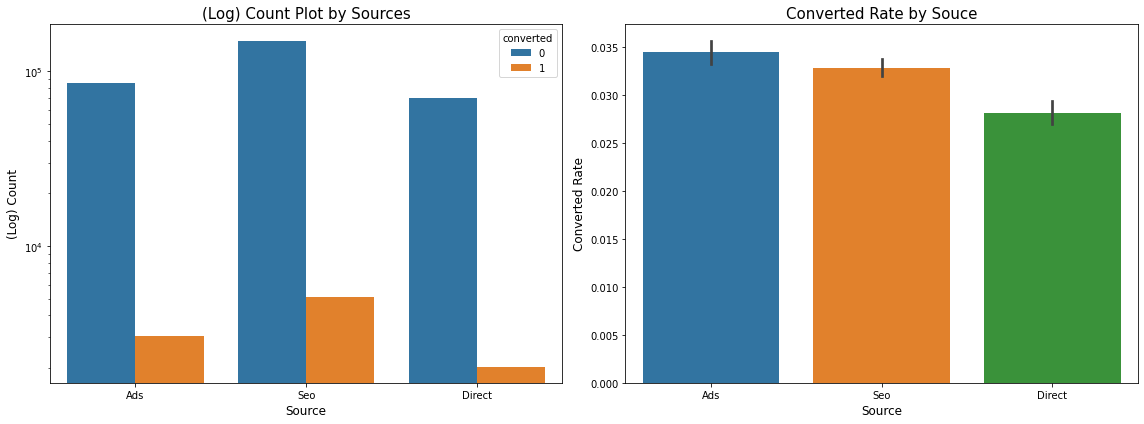

In [34]:
# visualization of different sources 
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
sns.countplot(x='source', hue='converted', data=data, ax=ax[0])
ax[0].set_xlabel('Source', fontsize=12)
ax[0].set_ylabel('(Log) Count', fontsize=12)
ax[0].set_yscale('log')
ax[0].set_title('(Log) Count Plot by Sources', fontsize=15)

sns.barplot(x='source', y='converted', data=data, ax=ax[1])
ax[1].set_xlabel('Source', fontsize=12)
ax[1].set_ylabel('Converted Rate', fontsize=12)
ax[1].set_title('Converted Rate by Souce', fontsize=15)
plt.tight_layout()
plt.show();

## Total Page Visited 

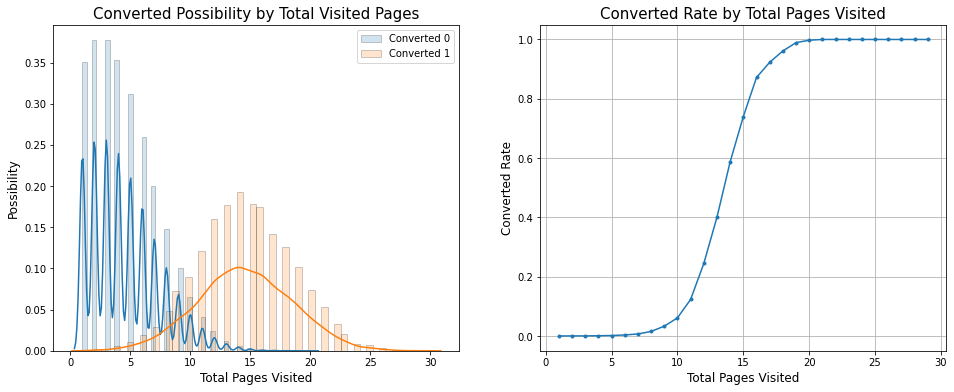

In [35]:
# visualization of total page visited 
grouped = data[['total_pages_visited', 'converted']].groupby(['total_pages_visited']).mean().reset_index()
hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16, 6))
sns.distplot(data[data['converted']==0]['total_pages_visited'], label='Converted 0', ax=ax[0], hist_kws=hist_kws)
sns.distplot(data[data['converted']==1]['total_pages_visited'], label='Converted 1', ax=ax[0], hist_kws=hist_kws)
ax[0].set_xlabel('Total Pages Visited', fontsize=12)
ax[0].set_ylabel('Possibility', fontsize=12)
ax[0].set_title('Converted Possibility by Total Visited Pages', fontsize=15)
ax[0].legend()

ax[1].plot(grouped['total_pages_visited'], grouped['converted'], '.-')
ax[1].set_xlabel('Total Pages Visited', fontsize=12)
ax[1].set_ylabel('Converted Rate', fontsize=12)
ax[1].set_title('Converted Rate by Total Pages Visited', fontsize=15)
ax[1].grid(True)
plt.show();

- **Chinese conversion rate is obviously lower than other countries.**

- **Though Germany doesn't have a large user base, the conversion rate is high.**

- **Younger users are more likely to buy something on the site.**

- **Though more new users visited the site, old users are more likely to buy on the site.**

- **The more pages user visited, the higher possibility the user buy things.**

# Modeling

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, recall_score

## Randome Forest Model 

In [44]:
# dummy variables for the categorial featuers 
X = pd.get_dummies(data[['country', 'age', 'total_pages_visited', 'source', 'new_user']])
y = data.converted

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=66)

rf = RandomForestClassifier(max_depth=4, max_features=3, random_state=66, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('---Accuracy---')
print(round(rf.score(X_test, y_test), 2))

print('---Performance---')
print(classification_report(y_true=y_test, y_pred=y_pred))

---Accuracy---
0.94
---Performance---
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     61220
           1       0.34      0.92      0.50      2020

    accuracy                           0.94     63240
   macro avg       0.67      0.93      0.73     63240
weighted avg       0.98      0.94      0.95     63240



In [71]:
pd.Series(rf.feature_importances_, index=X_train.columns)

age                    0.030465
total_pages_visited    0.748780
new_user               0.123281
country_China          0.083231
country_Germany        0.002134
country_UK             0.007080
country_US             0.004652
source_Ads             0.000088
source_Direct          0.000256
source_Seo             0.000033
dtype: float64

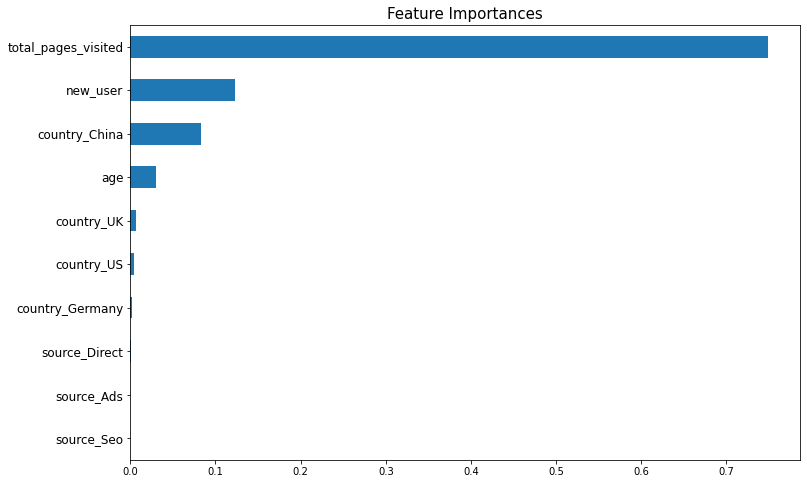

In [74]:
plt.figure(figsize=(12, 8))
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importance.sort_values().plot(kind = 'barh')
plt.yticks(fontsize=12)
plt.title('Feature Importances', fontsize=15)
plt.show();

- **Total pages visited is the most important factor to decide users whether to convert.**

- **However, it's the least 'actionable'. Since when clients visit many pages, then already want to buy. Also, in order to buy, you have to click on multiple pages.**

- **Therefore, let's rebuid the Random Forest Model without total_pages_visited.**

## Rebuild RF Model without total_pages_visited

In [78]:
rf.fit(X_train.drop(['total_pages_visited'], axis=1), y_train)
y_pred = rf.predict(X_test.drop(['total_pages_visited'], axis=1))

print('---Accuracy---')
print(round(rf.score(X_test.drop(['total_pages_visited'], axis=1), y_test), 2))

print('---Performance---')
print(classification_report(y_true=y_test, y_pred=y_pred))

---Accuracy---
0.74
---Performance---
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     61220
           1       0.08      0.71      0.15      2020

    accuracy                           0.74     63240
   macro avg       0.54      0.73      0.50     63240
weighted avg       0.96      0.74      0.82     63240



- **Though accuracy went down, the model is still good enough to give us insights.**

In [83]:
pd.Series(rf.feature_importances_, index=X_train.drop(['total_pages_visited'], axis=1).columns)

age                0.145385
new_user           0.452045
country_China      0.322105
country_Germany    0.013765
country_UK         0.024953
country_US         0.039949
source_Ads         0.000340
source_Direct      0.001299
source_Seo         0.000158
dtype: float64

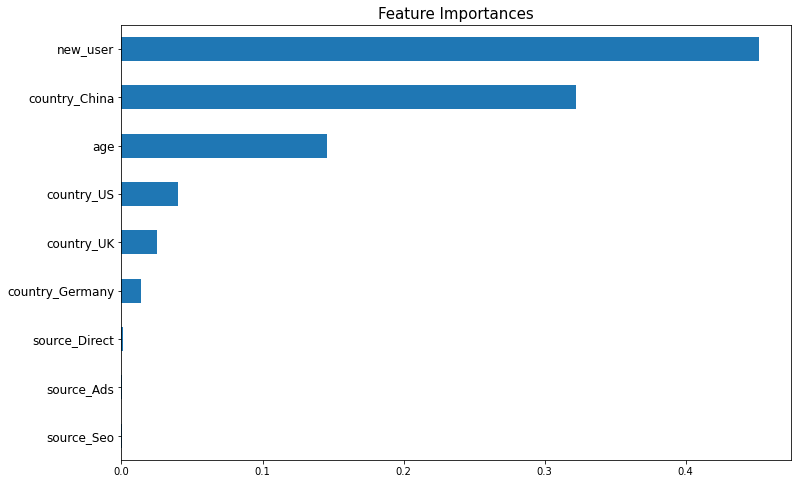

In [85]:
plt.figure(figsize=(12, 8))
feature_importance = pd.Series(rf.feature_importances_, index=X_train.drop(['total_pages_visited'], axis=1).columns)
feature_importance.sort_values().plot(kind = 'barh')
plt.yticks(fontsize=12)
plt.title('Feature Importances', fontsize=15)
plt.show();

- **New User is the most important factor to determine the conversion rate.**

- **China ranks number two important factors to determine the conversion rate, even more important than age.**

- **Souce-related dummies don't seem to matter at all.**

## Partial Dependence Plots

In [88]:
from pdpbox import pdp, info_plots

### Country

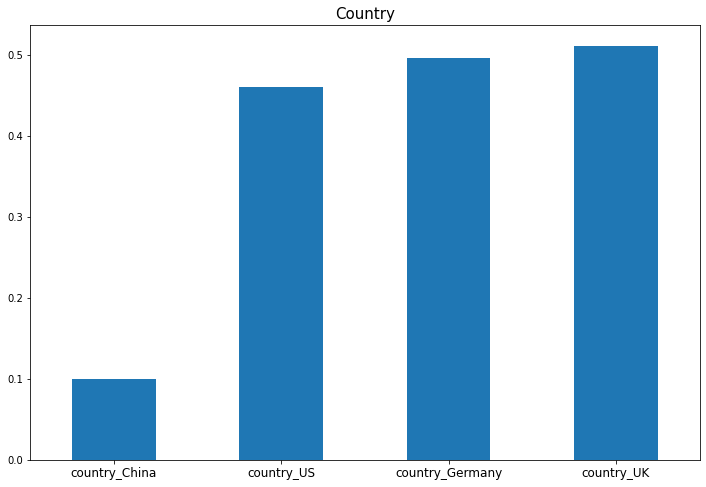

In [90]:
# country 
plt.figure(figsize=(12, 8))
pdp_iso = pdp.pdp_isolate(model=rf, dataset=X_train.drop(['total_pages_visited'], axis=1), 
                          model_features=list(X_train.drop(['total_pages_visited'], axis=1)), 
                          feature=['country_China', 'country_Germany', 'country_UK', 'country_US'], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values().plot(kind='bar')
plt.title('Country', fontsize=15)
plt.xticks(fontsize=12, rotation=0)
plt.show()

### Source

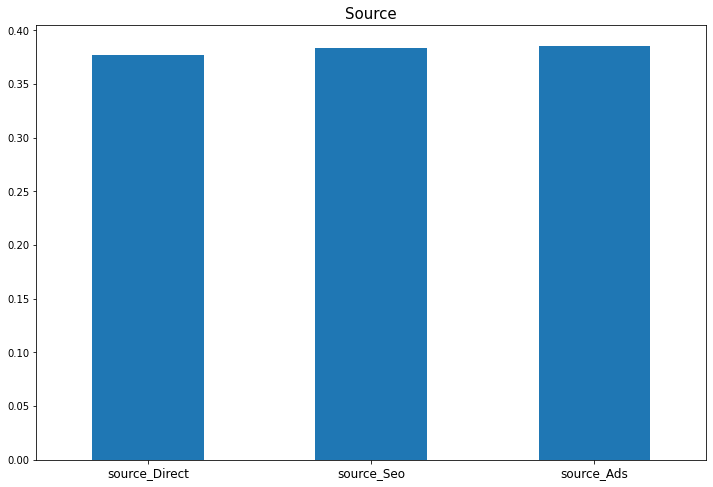

In [92]:
plt.figure(figsize=(12, 8))
pdp_iso = pdp.pdp_isolate(model=rf, dataset=X_train.drop(['total_pages_visited'], axis=1), 
                          model_features=list(X_train.drop(['total_pages_visited'], axis=1)), 
                          feature=['source_Direct', 'source_Ads', 'source_Seo'], 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values().plot(kind='bar')
plt.title('Source', fontsize=15)
plt.xticks(fontsize=12, rotation=0)
plt.show()

### New User 

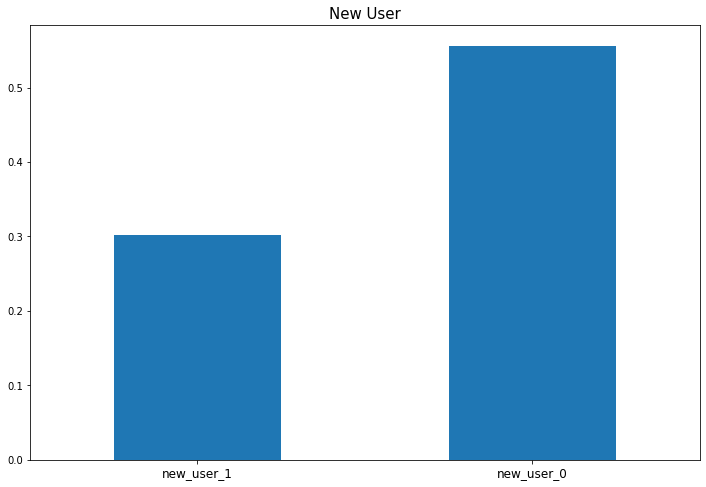

In [112]:
pdp_iso = pdp.pdp_isolate(model=rf, dataset=X_train.drop(['total_pages_visited'], axis=1), 
                          model_features=list(X_train.drop(['total_pages_visited'], axis=1)), 
                          feature='new_user', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values().plot(kind='bar', figsize=(12, 8))

plt.title('New User', fontsize=15)
plt.xticks(fontsize=12, rotation=0)
plt.show()

### Age 

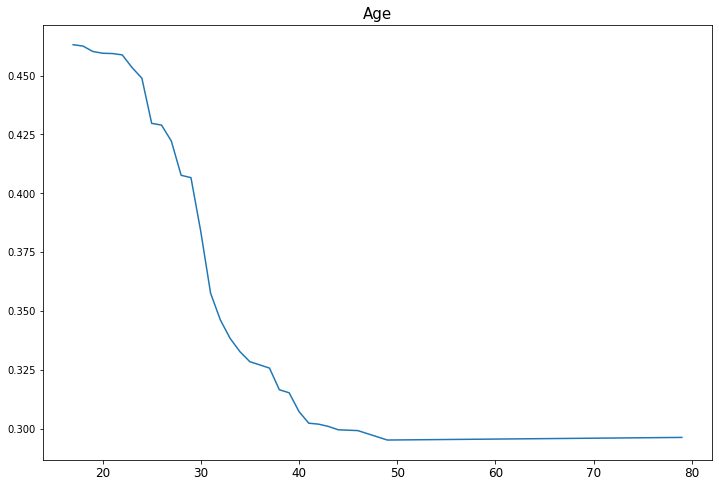

In [100]:
plt.figure(figsize=(12, 8))
pdp_iso = pdp.pdp_isolate(model=rf, dataset=X_train.drop(['total_pages_visited'], axis=1), 
                          model_features=list(X_train.drop(['total_pages_visited'], axis=1)), 
                          feature='age', 
                          num_grid_points=50)
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.feature_grids)
pdp_dataset.plot()
plt.title('Age', fontsize=15)
plt.xticks(fontsize=12, rotation=0)
plt.show()

**From the above partial dependence plots, we could conclude that:**

- **Users in US, UK, and Germany significantly increases the probability of conversion. However, China is very bad for conversion.**

- **Users with old accounts have higher potential to convert.**

- **Sites works well for young people and get worse for >30yr old users.**

- **Source is less relevant.**

## Plot Simple Decision Tree

In [115]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

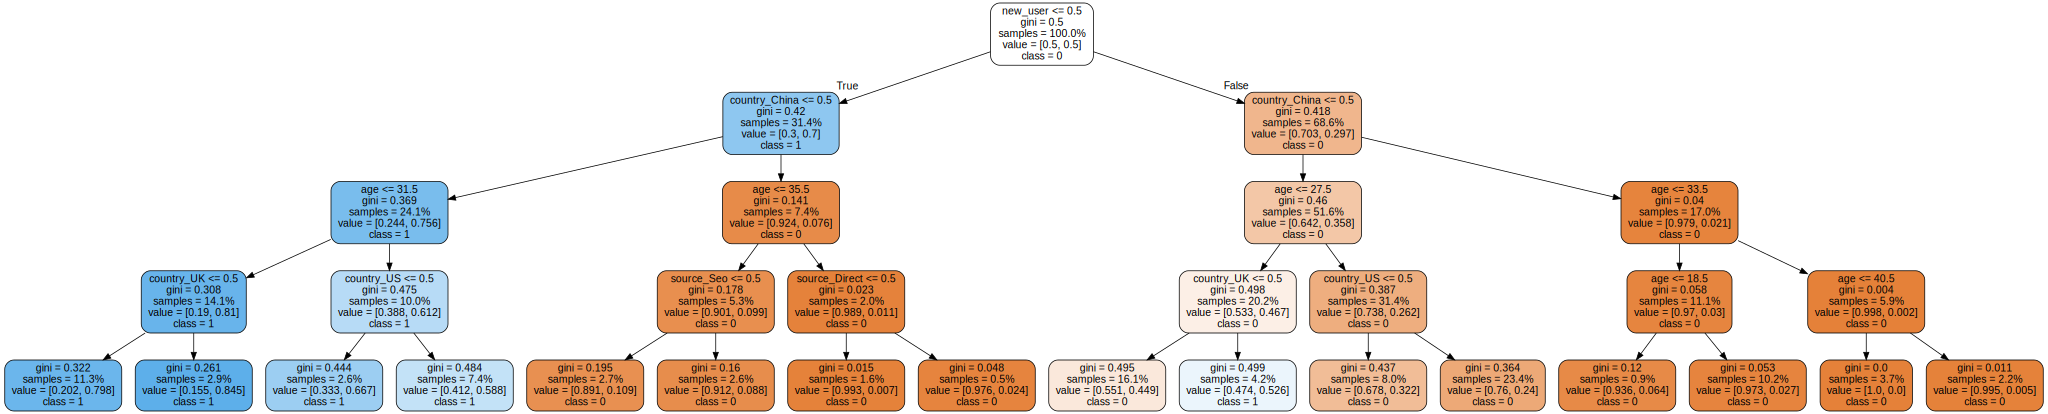

In [125]:
# build tree model
tree = DecisionTreeClassifier(max_depth=4, max_features=3, class_weight='balanced', random_state=66)
tree.fit(X_train.drop(['total_pages_visited'], axis=1), y_train)

# visualization 
dot_data = export_graphviz(tree, out_file=None, feature_names=X_train.drop(['total_pages_visited'], axis=1).columns, 
                           class_names = ['0', '1'],
                           rounded=True, proportion=True, filled=True)
graph = Source(dot_data, format='png')
graph.size